In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.matlib

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
cluster_data = data[["Fare","Age"]].copy(deep=True)
cluster_data.dropna(axis=0,inplace=True)
cluster_data.sort_values(by=["Fare","Age"],inplace=True)


In [5]:
array = np.array(cluster_data)

In [6]:
array

array([[  0.    ,  19.    ],
       [  0.    ,  25.    ],
       [  0.    ,  36.    ],
       ...,
       [512.3292,  35.    ],
       [512.3292,  35.    ],
       [512.3292,  36.    ]])

In [17]:
def distance(X1,X2):
    return (sum((X1-X2)**2))**(1/2)

In [18]:
def assign_cluster(centroids,array):
    clusters = []
    for i in range(array.shape[0]):
        dist = []
        for centroid in centroids:
            dist.append(distance(centroid,array[i]))
            
        cluster = [j for j, val in enumerate(dist) if val ==min(dist)]
        clusters.append(cluster[0])    
    return clusters 

In [27]:
def new_centroids(clusters,array):
    centroids2 = []
    cluster_df = pd.concat([pd.DataFrame(array),pd.DataFrame(clusters,columns=["cluster"])],axis=1)
    
    for c in set(cluster_df["cluster"]):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        centroids2.append(cluster_mean)
    return centroids2

In [28]:
def centroid_variance(clusters,array):
    sum_square = []
    cluster_df = pd.concat([pd.DataFrame(array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_square.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_square

In [29]:
k = 4
vars = []
centroids = [array[i+2] for i in range(k)]
clusters = assign_cluster(centroids,array)
initial_clusters = clusters
print(0, round(np.mean(centroid_variance(clusters,array))))

for i in range(20):
    centroids = new_centroids(clusters,array)
    clusters = assign_cluster(centroids,array)
    var = np.mean(centroid_variance(clusters,array))
    vars.append(var)
    print(i+1, round(var))

0 507874.0
1 259347.0
2 229172.0
3 182890.0
4 145160.0
5 128549.0
6 120822.0
7 111083.0
8 108858.0
9 108504.0
10 108219.0
11 107999.0
12 107851.0
13 107678.0
14 107171.0
15 106905.0
16 106818.0
17 106803.0
18 106799.0
19 106798.0
20 106796.0


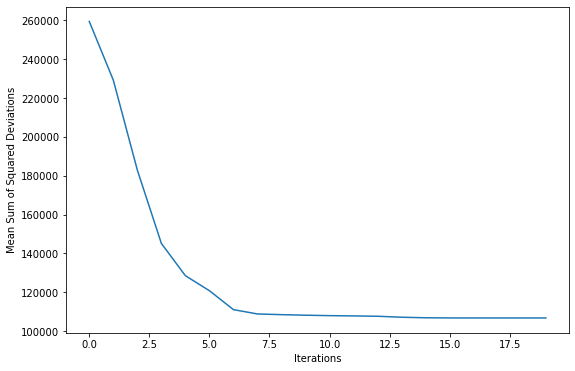

In [30]:
plt.subplots(figsize=(9,6))
plt.plot(vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd', bpi=150)